In [1]:
!git clone https://github.com/cbtn-data-science-ml/ml_datasets.git

fatal: destination path 'ml_datasets' already exists and is not an empty directory.


In [2]:
import os
os.chdir('ml_datasets')

In [3]:
%pwd

'/Users/barrios/Desktop/GitHub/tensorflow-professional-developer/08_build_multiclass_food_10_classifier/ml_datasets'

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'food_10/train/',
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'food_10/test/',
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
model = Sequential([
    Conv2D(10, (3,3), input_shape=(100, 100, 3)),
    Activation(activation='relu'),
    Dropout(0.2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

Epoch 1/25


2024-06-04 09:46:55.143557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-06-04 09:46:55.146733: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - ETA: 0s - loss: 2.1676 - accuracy: 0.2074

2024-06-04 09:47:17.058320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


250/250 [==============================] - 25s 100ms/step - loss: 2.1676 - accuracy: 0.2074 - val_loss: 1.9776 - val_accuracy: 0.3245
Epoch 2/25
250/250 [==============================] - 25s 98ms/step - loss: 1.9921 - accuracy: 0.2930 - val_loss: 1.9098 - val_accuracy: 0.3570
Epoch 3/25
250/250 [==============================] - 25s 99ms/step - loss: 1.9599 - accuracy: 0.3030 - val_loss: 1.8888 - val_accuracy: 0.3490
Epoch 4/25
250/250 [==============================] - 25s 99ms/step - loss: 1.9020 - accuracy: 0.3306 - val_loss: 1.8068 - val_accuracy: 0.4005
Epoch 5/25
250/250 [==============================] - 25s 101ms/step - loss: 1.8581 - accuracy: 0.3471 - val_loss: 1.8465 - val_accuracy: 0.3845
Epoch 6/25
250/250 [==============================] - 26s 103ms/step - loss: 1.8032 - accuracy: 0.3725 - val_loss: 1.6715 - val_accuracy: 0.4540
Epoch 7/25
250/250 [==============================] - 26s 104ms/step - loss: 1.7752 - accuracy: 0.3780 - val_loss: 1.6630 - val_accuracy: 0.4300

In [10]:
import matplotlib.pyplot as plt

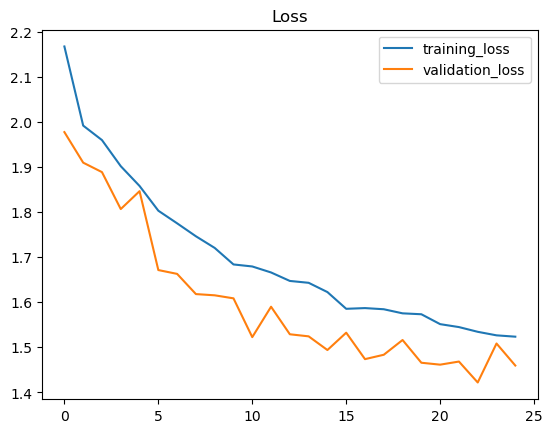

In [11]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training_loss')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.legend()

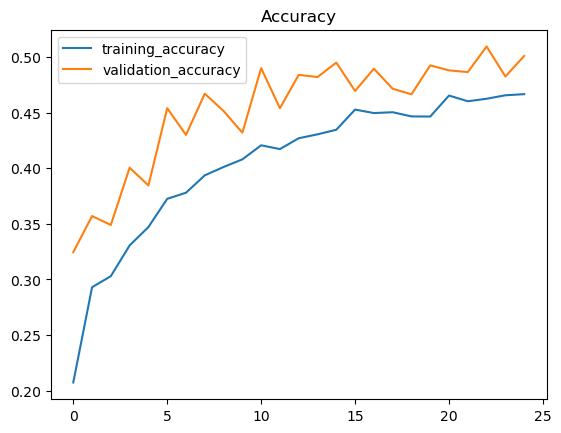

In [12]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='training_accuracy')
plt.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='validation_accuracy')
plt.title('Accuracy')
plt.legend()

In [13]:
# More Data Points
# Improve Data Quality
# Data Agumentation
# Transfer Learning
# Learning Rate

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 10)        280       
                                                                 
 activation (Activation)     (None, 98, 98, 10)        0         
                                                                 
 dropout (Dropout)           (None, 98, 98, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 10)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 10)        0         
                                                        

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 198, 198, 10)      280       
                                                                 
 activation (Activation)     (None, 198, 198, 10)      0         
                                                                 
 dropout (Dropout)           (None, 198, 198, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 10)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 98, 98, 10)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 10)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 10)        0         
                                                                 
 flatten (Flatten)           (None, 23040)             0         
                                                                 
 dense (Dense)               (None, 10)                230410    
                                                                 
=================================================================
Total params: 232,510
Trainable params: 232,510
Non-trainable params: 0
_________________________________________________________________
```